In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import numpy as np

from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex import results_dir
import matplotlib.pylab as plt

from matplotlib.patches import Patch
%matplotlib inline

### STRFs comparison

INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_mel_lib_ucsf_timit_trf_lags200_bw50_ahmed_25 0.3687004811378996
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_wavlet_ucsf_timit_trf_lags200_bw50_ahmed_25 0.43576601309025814
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_mel_ucsf_timit_trf_lags200_bw50_ahmed_25 0.46191797778544125
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_mel_ds_ucsf_timit_trf_lags200_bw50_ahmed_25 0.48480005000800114
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_mel_wh_ucsf_timit_trf_lags200_bw50_ahmed_25 0.5269198674825601
model_name 'cochleogram' not recognizable!!!
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
STRF_freqs80_coch_ucsf_timit_trf_lags200_bw50_ahmed_25 0.5350408969767726
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
STRF_freqs8

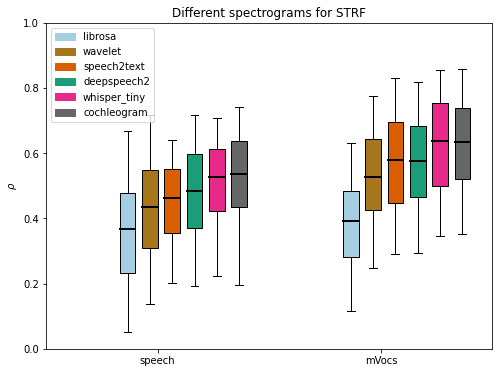

In [2]:
save_tikz=False
threshold =0.5
lag = 200

area = 'all'
bin_width = 50
delay = 0
normalized=True
model_name = 'STRF_freqs80'
result_id = 'ahmed_25'
# result_id = 'regression_improved'

timit_identifiers = {
    'librosa': f'mel_lib_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',
    'wavelet': f'wavlet_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',
    'speech2text': f'mel_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',
    'deepspeech2': f'mel_ds_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',
    'whisper_tiny': f'mel_wh_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',       # whisper STRF
    'cochleogram': f'coch_ucsf_timit_trf_lags{lag}_bw{bin_width}_{result_id}',
}
mVocs_identifiers = {
    'librosa': f'mel_lib_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',
    'wavelet': f'wavlet_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',            # wavelet STRF
    'speech2text': f'mel_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',           # speech2text STRF
    'deepspeech2': f'mel_ds_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',        # deepspeechs STRF
    'whisper_tiny': f'mel_wh_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',       # whisper STRF
    'cochleogram': f'coch_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_{result_id}',
}
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35
spacing = 0.5
groups_distance = 5
legends = []
indices = []
alpha = 1
group_locations = np.array([0, groups_distance])
mVocs = False
group = group_locations[0]
for idx, (label, iden) in enumerate(timit_identifiers.items()):
    if label == 'wavelet':
        color = PlotterUtils.colors[-2]
    elif label == 'librosa':
        color = PlotterUtils.paired_colors[0]
    else:
        color = PlotterUtils.get_model_specific_color(label)
    baseline_identifier = model_name + '_' + iden
    strf_obj = STRFCorrelations(baseline_identifier)
    baseline_dist = strf_obj.get_correlations_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=delay,
        threshold=threshold, normalized=normalized, mVocs=mVocs,
        lag=None,   # saying lag=0.3
    )
    print(f"{baseline_identifier} {np.median(baseline_dist)}")
    indices.append(group+(idx*spacing)-width/2)
    ax.boxplot(
        baseline_dist,
        positions=[indices[-1]], widths=width,
        patch_artist=True,
        boxprops=dict(facecolor=color, alpha=alpha),
        medianprops = dict(color='k', linewidth=2), whis=[5, 95],
        showfliers=False,
        )
    legends.append(Patch(color=color, label=label))
mVocs = True
group = group_locations[1]
for idx, (label, iden) in enumerate(mVocs_identifiers.items()):
    if label == 'wavelet':
        color = PlotterUtils.colors[-2]
    elif label == 'librosa':
        color = PlotterUtils.paired_colors[0]
    else:
        color = PlotterUtils.get_model_specific_color(label)
    baseline_identifier = model_name + '_' + iden
    strf_obj = STRFCorrelations(baseline_identifier)
    baseline_dist = strf_obj.get_correlations_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=delay,
        threshold=threshold, normalized=normalized, mVocs=mVocs,
        lag=None,   # saying lag=0.3
    )
    indices.append(group+(idx*spacing)-width/2)
    print(f"{baseline_identifier} {np.median(baseline_dist)}")
    ax.boxplot(
        baseline_dist,
        positions=[indices[-1]],
        widths=width,
        patch_artist=True,
        boxprops=dict(facecolor=color, alpha=alpha),
        medianprops = dict(color='k', linewidth=2),
        whis=[5, 95],
        showfliers=False,
        )
x_tick_labels = timit_identifiers.keys()
ax.set_xticks(group_locations+spacing, ['speech', 'mVocs'], rotation=0, ha="center")
ax.legend(handles=legends, loc='best')
ax.set_ylabel(f"$\\rho$")
ax.set_title(f"Different spectrograms for STRF")
ax.set_ylim(0.0, 1.0)
ax.set_xlim(-2, 8)
if save_tikz:
    filepath = os.path.join(
        results_dir,
        'tikz_plots',
        f"gap-{threshold}-spectrograms-comparison-trf{lag}.tex"
        )
    PlotterUtils.save_tikz(filepath)